In [6]:
from functions import *
import pandas as pd
import os

In [5]:
labels = [
    "득점",
    "도움",
    "슈팅",
    "유효슈팅",
    "블락된 슈팅",
    "벗어난 슈팅",
    "PA내 슈팅",
    "PA외 슈팅",
    "오프사이드",
    "프리킥 유효슈팅",
    "프리킥 크로스",
    "코너킥",
    "스로인",
    "드리블",
    "패스",
    "키패스",
    "수비진영 패스",
    "롱패스",
    "단거리패스",
    "전방패스",
    "중거리패스",
    "횡패스",
    "후방패스",
    "크로스",
    "공격진영 패스",
    "중앙지역 패스",
    "태클",
    "경합(공중)",
    "경합(지상)",
    "인터셉트",
    "클리어링",
    "차단",
    "획득",
    "블락",
    "볼미스",
    "파울",
    "피파울",
    "경고",
    "퇴장",
    "실점",
    "캐칭",
    "펀칭",
    "골킥",
    "공중 클리어링",
]
team_list = ["강원", "광주", "김천", "대구", "대전", "서울", "수원FC", "울산", "인천", "전북", "제주", "포항"]

In [ ]:
columns = ["points", "win", "draw", "loss", "goals", "loss_goal"]
for col in columns:
    make_percentage(col)

In [14]:
df = pd.read_csv(f"2024_team_data/raw_data/강원.csv")# 그냥 대표임

for i in range(0,44):
    every_team_make_percentage(df["label"][i])
# 이걸로 스탯csv파일 생성

In [ ]:
# 아니 내가 여기서 이제 뭐를 하려는건데
# 아니면 공분산 어떠냐? 퍼센트로 일단 점을 찍어 놓고 

In [1]:
from functions import make_graph

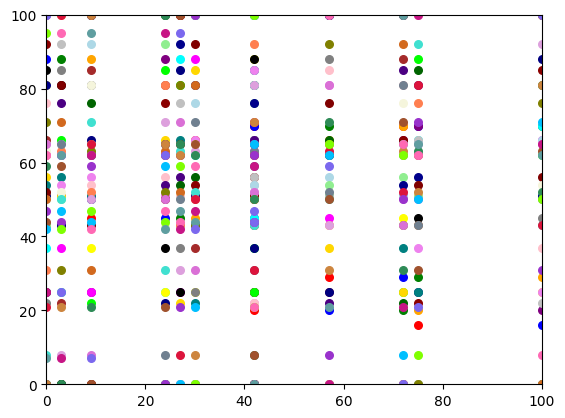

In [2]:
data_list_결과 =make_graph("points")